In [1]:
import numpy as np
import pandas as pd 
from sklearn import tree
import graphviz
from IPython.display import Image


In [2]:
df = pd.read_csv("./iris.csv") # Read CSV file

In [3]:
df.head(15) # First 15 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa



# Data Prep

In [4]:
df = df.drop('Id',axis=1) # drop ID col

In [5]:
df.isnull().sum() # Check for NULL values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df = df.sample(frac=1) # Shuffle the data
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
109,7.2,3.6,6.1,2.5,Iris-virginica
42,4.4,3.2,1.3,0.2,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
126,6.2,2.8,4.8,1.8,Iris-virginica
110,6.5,3.2,5.1,2.0,Iris-virginica
87,6.3,2.3,4.4,1.3,Iris-versicolor
84,5.4,3.0,4.5,1.5,Iris-versicolor
79,5.7,2.6,3.5,1.0,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
34,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
df_c = df.copy() # make a copy of original df
y = df_c.pop('Species') # Targets
X = df_c # Features

# For training
X_train = X[:110]
y_train = y[:110]

# For testing
X_test = X[110:]
y_test = y[110:]

In [8]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
109,7.2,3.6,6.1,2.5
42,4.4,3.2,1.3,0.2
13,4.3,3.0,1.1,0.1
126,6.2,2.8,4.8,1.8
110,6.5,3.2,5.1,2.0


In [9]:
y_train.head()

109    Iris-virginica
42        Iris-setosa
13        Iris-setosa
126    Iris-virginica
110    Iris-virginica
Name: Species, dtype: object

In [10]:
dec_tree = tree.DecisionTreeClassifier(max_depth=3,min_impurity_decrease=0.15) # initilaize the classifier

# Fitting

In [11]:
dec_tree = dec_tree.fit(X_train,y_train) # Train the classifier 

In [12]:
ddata = tree.export_graphviz(dec_tree,feature_names=list(X.columns),  # use graphviz to export the tree as png
                     class_names= list(set(df['Species'])),
                     filled=True, rounded=True,  
                     special_characters=True)
gr = graphviz.Source(ddata)
gr.render('iris-out',format='png')

'iris-out.png'

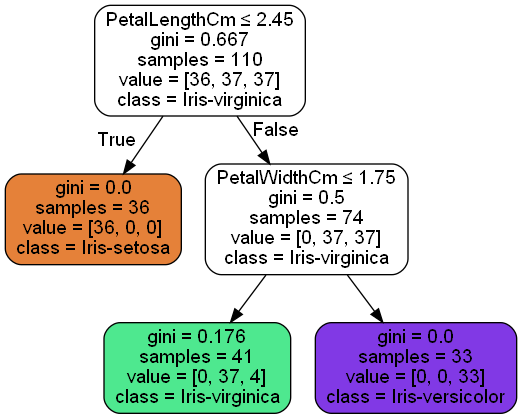

In [13]:
Image('./iris-out.png') # show the image

# Testing

In [14]:
X_test.head() # test values

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
148,6.2,3.4,5.4,2.3
46,5.1,3.8,1.6,0.2
35,5.0,3.2,1.2,0.2
143,6.8,3.2,5.9,2.3
94,5.6,2.7,4.2,1.3


In [15]:
inds = np.random.randint(0,20,[5,]) # Take 5 random indices
data = np.array(X_test.iloc[inds]) # Take corr. samples
data

array([[6.9, 3.1, 4.9, 1.5],
       [6.4, 3.2, 5.3, 2.3],
       [6.2, 3.4, 5.4, 2.3],
       [5.6, 2.7, 4.2, 1.3],
       [6. , 2.2, 5. , 1.5]])

In [16]:
list(dec_tree.predict(data)) # Predict on test data

['Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor']

In [17]:
list(y_test.iloc[inds]) # ground truth values

['Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica']

In [18]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

y_pred = dec_tree.predict(np.array(X_train)) # get the predictions on training data

In [19]:
acc = accuracy_score(y_train,y_pred)
print("Training accuracy: {}%".format(acc*100))

Training accuracy: 96.36363636363636%


In [20]:
val_acc = dec_tree.score(X_test,y_test)
print("Test accuracy: {}%".format(val_acc*100))

Test accuracy: 95.0%


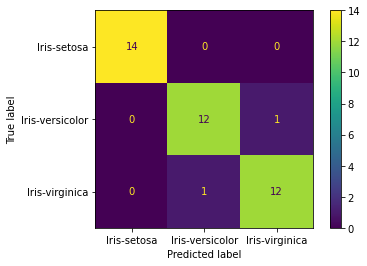

In [21]:
plot_confusion_matrix(dec_tree, X_test, y_test)

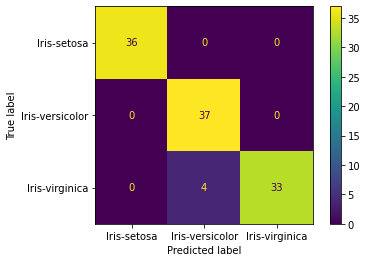

In [22]:
plot_confusion_matrix(dec_tree, X_train, y_train)